In [16]:
import pandas as pd

df = pd.read_csv("spam.csv", encoding= 'latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [17]:
print(df.shape)
print(df['label'].value_counts())
df.info()

(5572, 2)
label
ham     4825
spam     747
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


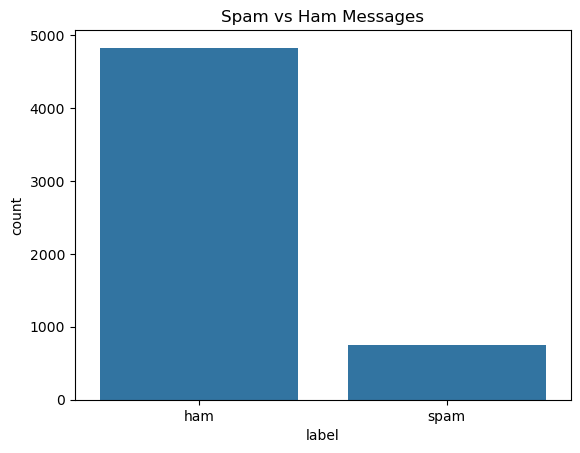

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Spam vs Ham Messages")
plt.show()

In [19]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [28]:
import re
import nltk         #Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

## Initialize
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define text cleaning function
def preprocess_text(text):
    text = text.lower()         #Lowercase
    text = re.sub(r'[a-z\s]', '', text)         # Remove punctuation and numbers
    words = text.split()                        # Tokenize
    words = [word for word in words if word not in stop_words]      # Remove stopwords
    words = [stemmer.stem(word) for word in words]          # Apply stemming
    return words

## Apply preprocessing
df['tokens'] = df['message'].apply(preprocess_text)

print(df[['message', 'tokens']].head())


                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                              tokens  
0                        [,........]  
1                           [......]  
2  [2212005.87121()&'0845281007518']  
3                           [......]  
4                               [',]  


In [32]:
# TF-IDF = Term Frequency - Inverse Document Frequency
# for TF-IDF we need raw text strings-so join tokens back into text

df ['clean_text'] = df['tokens'].apply(lambda x: ' '.join(x))


In [33]:
## Convert Text to Numbers using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# create the vectorizer
tfidf = TfidfVectorizer(max_features=3000)      # limit to top 3000 words

# Transform the text
x = tfidf.fit_transform(df['clean_text']).toarray()


In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['label'])   # ham -> 0, spam -> 1

In [35]:
print(x.shape)
print(y[:5])

(5572, 858)
[0 0 1 0 0]
